In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spotify = pd.read_csv("C:/Users/Hp Pc/Downloads/Most Streamed Spotify Songs 2024.csv", encoding = "unicode_escape")

In [3]:
spotify

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [4]:
spotify.columns.to_list()

['Track',
 'Album Name',
 'Artist',
 'Release Date',
 'ISRC',
 'All Time Rank',
 'Track Score',
 'Spotify Streams',
 'Spotify Playlist Count',
 'Spotify Playlist Reach',
 'Spotify Popularity',
 'YouTube Views',
 'YouTube Likes',
 'TikTok Posts',
 'TikTok Likes',
 'TikTok Views',
 'YouTube Playlist Reach',
 'Apple Music Playlist Count',
 'AirPlay Spins',
 'SiriusXM Spins',
 'Deezer Playlist Count',
 'Deezer Playlist Reach',
 'Amazon Playlist Count',
 'Pandora Streams',
 'Pandora Track Stations',
 'Soundcloud Streams',
 'Shazam Counts',
 'TIDAL Popularity',
 'Explicit Track']

PREPROCESSING

In [5]:
len(spotify.Track.value_counts())

4370

In [6]:
len(spotify['Album Name'].value_counts())

4005

In [7]:
len(spotify.Artist.value_counts())

1999

In [8]:
popularity = spotify.filter(regex = 'Stream|Views')

In [9]:
popularity.columns

Index(['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams',
       'Soundcloud Streams'],
      dtype='object')

In [10]:
popularity.isna().sum()

Spotify Streams        113
YouTube Views          308
TikTok Views           981
Pandora Streams       1106
Soundcloud Streams    3333
dtype: int64

In [11]:
popularity = popularity.fillna(0)

In [12]:
popularity.isna().sum()

Spotify Streams       0
YouTube Views         0
TikTok Views          0
Pandora Streams       0
Soundcloud Streams    0
dtype: int64

In [13]:
#popularity = popularity.replace(",", " ")
popularity = popularity.replace( regex= ",", value= "")

In [14]:
popularity

,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams
0,390470936,84274754,5332281936,18004655,4818457
1,323703884,116347040,208339025,7780028,6623075
2,601309283,122599116,3369120610,5022621,7208651
3,2031280633,1096100899,14603725994,190260277,0
4,107034922,77373957,0,4493884,207179
...,...,...,...,...,...
4595,305049963,149247747,143934379,20104066,50633006
4596,52282360,943920245,19935,0,0
4597,189972685,201027333,36849005,84426740,0
4598,145467020,1118595159,37757301,6817840,0


In [15]:
popularity = popularity.apply(lambda x: pd.to_numeric(x, errors = 'coerce'))

In [16]:
popularity = popularity.replace([float('inf'), -float('inf')], 0)

In [17]:
popularity.dtypes

Spotify Streams       int64
YouTube Views         int64
TikTok Views          int64
Pandora Streams       int64
Soundcloud Streams    int64
dtype: object

In [18]:
popularity

,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams
0,390470936,84274754,5332281936,18004655,4818457
1,323703884,116347040,208339025,7780028,6623075
2,601309283,122599116,3369120610,5022621,7208651
3,2031280633,1096100899,14603725994,190260277,0
4,107034922,77373957,0,4493884,207179
...,...,...,...,...,...
4595,305049963,149247747,143934379,20104066,50633006
4596,52282360,943920245,19935,0,0
4597,189972685,201027333,36849005,84426740,0
4598,145467020,1118595159,37757301,6817840,0


In [ ]:
social_reach  = spotify.filter(regex = 'Reach')
social_reach['Amazon Reach'] = spotify['Amazon Playlist Count']
social_reach['Apple Reach'] = spotify['Apple Music Playlist Count']

In [20]:
social_reach

,Spotify Playlist Reach,YouTube Playlist Reach,Deezer Playlist Reach,Amazon Reach,Apple Reach
0,"196,631,588","150,597,040","17,598,718",114.0,210.0
1,"174,597,137","156,380,351","10,422,430",111.0,188.0
2,"211,607,669","373,784,955","36,321,847",172.0,190.0
3,"136,569,078","3,351,188,582","24,684,248",210.0,394.0
4,"151,469,874","112,763,851","17,660,624",105.0,182.0
...,...,...,...,...,...
4595,"5,103,054","53,016","14,217",NaN,3.0
4596,"1,449,767","24,973,048",927,NaN,1.0
4597,"6,704,802","29,253,152",74,6.0,19.0
4598,"7,387,064","25,150,516",NaN,7.0,1.0


In [21]:
social_reach = social_reach.fillna(0)

In [22]:
social_reach.isnull().sum()

Spotify Playlist Reach    0
YouTube Playlist Reach    0
Deezer Playlist Reach     0
Amazon Reach              0
Apple Reach               0
dtype: int64

In [23]:
social_reach = social_reach.apply(lambda x: x.replace(regex= ",", value= "")) #remove all the commas
social_reach = social_reach.apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
#social_reach = social_reach.replace([float('inf'), -float('inf')], 0)

In [24]:
social_reach

,Spotify Playlist Reach,YouTube Playlist Reach,Deezer Playlist Reach,Amazon Reach,Apple Reach
0,196631588,150597040,17598718,114.0,210.0
1,174597137,156380351,10422430,111.0,188.0
2,211607669,373784955,36321847,172.0,190.0
3,136569078,3351188582,24684248,210.0,394.0
4,151469874,112763851,17660624,105.0,182.0
...,...,...,...,...,...
4595,5103054,53016,14217,0.0,3.0
4596,1449767,24973048,927,0.0,1.0
4597,6704802,29253152,74,6.0,19.0
4598,7387064,25150516,0,7.0,1.0


In [25]:
popularity.columns

Index(['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams',
       'Soundcloud Streams'],
      dtype='object')

In [26]:
popularity['pop_score'] = (popularity['Spotify Streams'] + 
                           popularity['YouTube Views'] + 
                           popularity['TikTok Views'] +
                           popularity['Pandora Streams'] + 
                           popularity['Soundcloud Streams'])

In [ ]:
popularity['pop_score'] = np.log(popularity['pop_score'])

In [28]:
len(popularity[popularity['pop_score'] <= 0])

22

In [29]:
popularity = popularity[popularity['pop_score'] > 0]

In [ ]:
popularity['pop_score'] = popularity['pop_score'].apply(lambda x: round(x,2))

In [31]:
popularity

,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams,pop_score
0,390470936,84274754,5332281936,18004655,4818457,22.49
1,323703884,116347040,208339025,7780028,6623075,20.31
2,601309283,122599116,3369120610,5022621,7208651,22.14
3,2031280633,1096100899,14603725994,190260277,0,23.61
4,107034922,77373957,0,4493884,207179,19.06
...,...,...,...,...,...,...
4595,305049963,149247747,143934379,20104066,50633006,20.32
4596,52282360,943920245,19935,0,0,20.72
4597,189972685,201027333,36849005,84426740,0,20.05
4598,145467020,1118595159,37757301,6817840,0,20.99


In [32]:
social_reach.columns

Index(['Spotify Playlist Reach', 'YouTube Playlist Reach',
       'Deezer Playlist Reach', 'Amazon Reach', 'Apple Reach'],
      dtype='object')

In [33]:
social_reach['reach'] = (social_reach['Spotify Playlist Reach'] +
                        social_reach['YouTube Playlist Reach'] +
                        social_reach['Deezer Playlist Reach'] +
                        social_reach['Amazon Reach'] +
                        social_reach['Apple Reach'])

In [ ]:
social_reach['reach'] = np.log(social_reach['reach'])

In [35]:
len(social_reach[social_reach['reach'] <= 0])

60

In [36]:
social_reach = social_reach[social_reach['reach'] >0]

In [ ]:
social_reach['reach'] = social_reach['reach'].apply(lambda x: round(x,2))

In [38]:
social_reach

,Spotify Playlist Reach,YouTube Playlist Reach,Deezer Playlist Reach,Amazon Reach,Apple Reach,reach
0,196631588,150597040,17598718,114.0,210.0,19.71
1,174597137,156380351,10422430,111.0,188.0,19.65
2,211607669,373784955,36321847,172.0,190.0,20.25
3,136569078,3351188582,24684248,210.0,394.0,21.98
4,151469874,112763851,17660624,105.0,182.0,19.46
...,...,...,...,...,...,...
4595,5103054,53016,14217,0.0,3.0,15.46
4596,1449767,24973048,927,0.0,1.0,17.09
4597,6704802,29253152,74,6.0,19.0,17.40
4598,7387064,25150516,0,7.0,1.0,17.30


In [39]:
track_stats = popularity.merge(social_reach,left_index=True, right_index=True)

In [40]:
track_stats

,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams,pop_score,Spotify Playlist Reach,YouTube Playlist Reach,Deezer Playlist Reach,Amazon Reach,Apple Reach,reach
0,390470936,84274754,5332281936,18004655,4818457,22.49,196631588,150597040,17598718,114.0,210.0,19.71
1,323703884,116347040,208339025,7780028,6623075,20.31,174597137,156380351,10422430,111.0,188.0,19.65
2,601309283,122599116,3369120610,5022621,7208651,22.14,211607669,373784955,36321847,172.0,190.0,20.25
3,2031280633,1096100899,14603725994,190260277,0,23.61,136569078,3351188582,24684248,210.0,394.0,21.98
4,107034922,77373957,0,4493884,207179,19.06,151469874,112763851,17660624,105.0,182.0,19.46
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,305049963,149247747,143934379,20104066,50633006,20.32,5103054,53016,14217,0.0,3.0,15.46
4596,52282360,943920245,19935,0,0,20.72,1449767,24973048,927,0.0,1.0,17.09
4597,189972685,201027333,36849005,84426740,0,20.05,6704802,29253152,74,6.0,19.0,17.40
4598,145467020,1118595159,37757301,6817840,0,20.99,7387064,25150516,0,7.0,1.0,17.30


In [41]:
track_stats = track_stats.merge(spotify[['Track', 'Album Name', 'Artist', 'Release Date', 'Track Score', 'Explicit Track']], 
                                left_index=True, right_index=True)

In [42]:
track_stats

,Spotify Streams,YouTube Views,TikTok Views,Pandora Streams,Soundcloud Streams,pop_score,Spotify Playlist Reach,YouTube Playlist Reach,Deezer Playlist Reach,Amazon Reach,Apple Reach,reach,Track,Album Name,Artist,Release Date,Track Score,Explicit Track
0,390470936,84274754,5332281936,18004655,4818457,22.49,196631588,150597040,17598718,114.0,210.0,19.71,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,725.4,0
1,323703884,116347040,208339025,7780028,6623075,20.31,174597137,156380351,10422430,111.0,188.0,19.65,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,545.9,1
2,601309283,122599116,3369120610,5022621,7208651,22.14,211607669,373784955,36321847,172.0,190.0,20.25,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,538.4,0
3,2031280633,1096100899,14603725994,190260277,0,23.61,136569078,3351188582,24684248,210.0,394.0,21.98,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,444.9,0
4,107034922,77373957,0,4493884,207179,19.06,151469874,112763851,17660624,105.0,182.0,19.46,Houdini,Houdini,Eminem,5/31/2024,423.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,305049963,149247747,143934379,20104066,50633006,20.32,5103054,53016,14217,0.0,3.0,15.46,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,19.4,1
4596,52282360,943920245,19935,0,0,20.72,1449767,24973048,927,0.0,1.0,17.09,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,19.4,0
4597,189972685,201027333,36849005,84426740,0,20.05,6704802,29253152,74,6.0,19.0,17.40,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,19.4,1
4598,145467020,1118595159,37757301,6817840,0,20.99,7387064,25150516,0,7.0,1.0,17.30,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,19.4,0


EXPLORATORY DATA ANALYSIS

In [43]:
track_stats['Release Date'] = pd.to_datetime(track_stats['Release Date'])

track_stats['year'] = track_stats['Release Date'].dt.year

Text(0.5, 1.0, 'Top Artists')

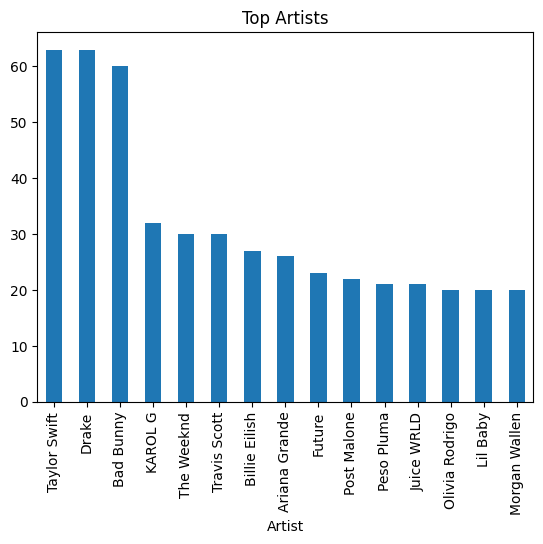

In [44]:
top_artists = track_stats['Artist'].value_counts().head(15)

top_artists.plot(kind ='bar')
plt.title('Top Artists')


Text(0.5, 1.0, 'Song Release by Year')

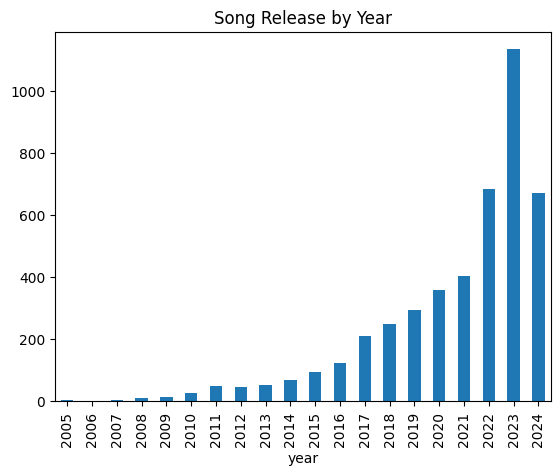

In [45]:
hg = track_stats.groupby('year')['Release Date'].count().tail(20)

hg.plot(kind='bar')
plt.title('Song Release by Year')

#songs released each year

In [46]:
track_stats['track_perf'] = (track_stats['pop_score']+
                            track_stats['reach'])



track_stats['track_perf'] = (track_stats['pop_score']/track_stats['track_perf']) * 100 #percent popularity/performance

In [47]:
track_stats['track_perf']

0       53.293839
1       50.825826
2       52.229299
3       51.787673
4       49.480789
          ...    
4595    56.791504
4596    54.800317
4597    53.538051
4598    54.818490
4599    52.373813
Name: track_perf, Length: 4534, dtype: float64

In [48]:
#compare the distribution of the custom Track_perf and Track_score

track_stats['ori_track_perf'] = (track_stats['Track Score']/10) 
#reduce the track_Score to the same range as the track_perf

Text(0.5, 1.0, 'Distribution of custom Track Score')

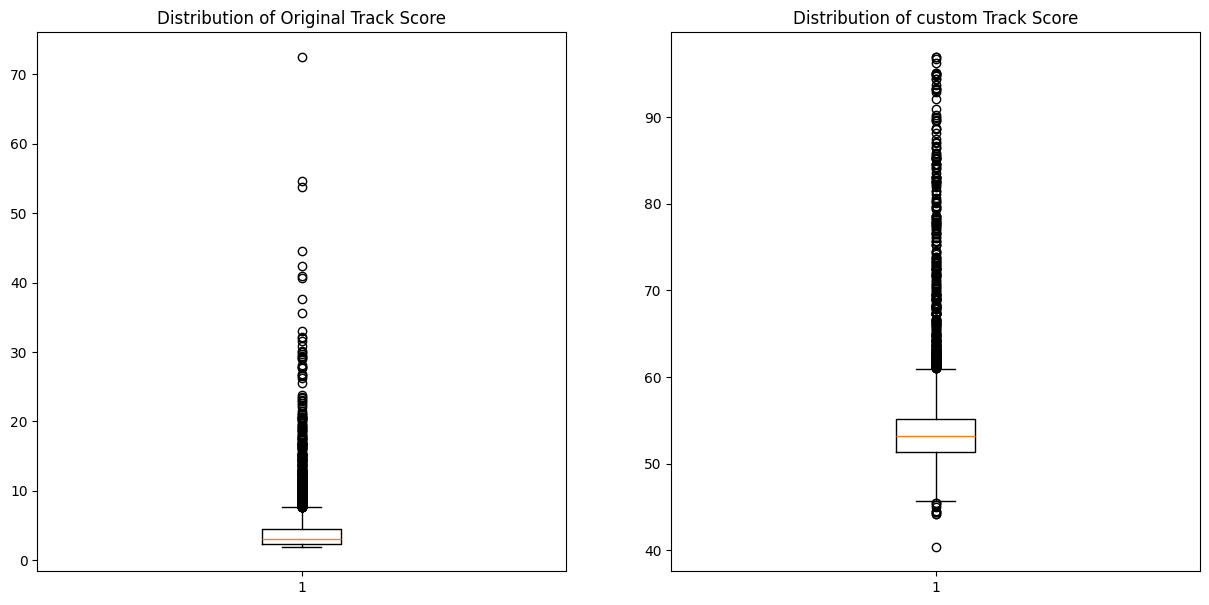

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

ax1.boxplot(track_stats['ori_track_perf'])
ax1.set_title("Distribution of Original Track Score")

ax2.boxplot(track_stats['track_perf'])
ax2.set_title("Distribution of custom Track Score")

#the Custom Track Score is more tightly distributed and thus be used to make predictions

MODELLING

In [50]:
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder

In [51]:
track_stats['Track_Code'] = track_stats['Track'].astype('category').cat.codes
track_stats['Artist_Code'] = track_stats['Artist'].astype('category').cat.codes


predictors = ['Spotify Streams', 'YouTube Views', 'TikTok Views', 'Pandora Streams',
       'Soundcloud Streams', 'Spotify Playlist Reach',
       'YouTube Playlist Reach', 'Deezer Playlist Reach', 'Amazon Reach',
       'Apple Reach', 'Explicit Track', 'year', 'Track_Code', 'Artist_Code']

target = ['track_perf']

In [52]:
train = track_stats[track_stats['year'] <= 2023]
test = track_stats[track_stats['year'] > 2023 ]

In [53]:
train.shape, test.shape

((3863, 23), (671, 23))

In [54]:
#Test different estimators to obtain the best.

model_params = {
    "svr" : {
        "model" : LinearSVR(random_state=42),
        "params" : {
            "C" : [1,3,5],
            "max_iter" : [1000, 1500, 2000]
        }
    },

    "hst" : {
        "model" : HistGradientBoostingRegressor(random_state=42),
        "params" : {
            "max_iter" : [75, 100, 150, 200],
            "max_depth" : [5, 10,15,20],
            "max_features" : [0.2, 0.5, 0.7, 1.0],
            "min_samples_leaf": [5,10,15,20]
        }
    },

    "rfc" :{
        "model" : RandomForestRegressor(random_state=42, n_jobs=2),
        "params" : {
            "n_estimators" : [50, 100, 200, 300],
            "max_depth": [5,10,15,20],
            "max_leaf_nodes": [2,5,7],
            "min_samples_leaf": [2,4,7,10]
        }
    }
}

In [55]:
tscv = TimeSeriesSplit(n_splits=3)

scores = []

#ct = ColumnTransformer([
    #('encode', OneHotEncoder(dtype=int), ['Track', 'Artist'])
#], 
  #remainder ='passthrough')

#preds_trans = ct.fit_transform(track_stats[predictors]) #transform the object columns

#preds_trans = preds_trans.toarray()   #convert sparse matrix to dense

for model_name, mp in model_params.items():
    #use pipeline to incorprate OneHotEncoding
    rgrs = RandomizedSearchCV(mp['model'], mp['params'], cv=tscv, random_state=42, n_iter=5, error_score ='raise')
    #pipe = make_pipeline(ct, rgrs)
    rgrs.fit(train[predictors], train[target])
    scores.append({
        'model': model_name,
        'best_score': rgrs.best_score_,
        'best_params': rgrs.best_params_
    })

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\U

In [56]:
for model_name, mp in model_params.items():
    print(f"models: {model_name}")
    print(f" mps: {mp}")

models: svr
 mps: {'model': LinearSVR(random_state=42), 'params': {'C': [1, 3, 5], 'max_iter': [1000, 1500, 2000]}}
models: hst
 mps: {'model': HistGradientBoostingRegressor(random_state=42), 'params': {'max_iter': [75, 100, 150, 200], 'max_depth': [5, 10, 15, 20], 'max_features': [0.2, 0.5, 0.7, 1.0], 'min_samples_leaf': [5, 10, 15, 20]}}
models: rfc
 mps: {'model': RandomForestRegressor(n_jobs=2, random_state=42), 'params': {'n_estimators': [50, 100, 200, 300], 'max_depth': [5, 10, 15, 20], 'max_leaf_nodes': [2, 5, 7], 'min_samples_leaf': [2, 4, 7, 10]}}


In [57]:
scores

[{'model': 'svr',
  'best_score': np.float64(-71199941.88136497),
  'best_params': {'max_iter': 1000, 'C': 1}},
 {'model': 'hst',
  'best_score': np.float64(0.9800061608525166),
  'best_params': {'min_samples_leaf': 5,
   'max_iter': 100,
   'max_features': 0.7,
   'max_depth': 20}},
 {'model': 'rfc',
  'best_score': np.float64(0.8931868616448608),
  'best_params': {'n_estimators': 50,
   'min_samples_leaf': 7,
   'max_leaf_nodes': 7,
   'max_depth': 15}}]

In [58]:
model = HistGradientBoostingRegressor(
    min_samples_leaf=5, max_iter =100, max_features = 0.7, max_depth =20)

model.fit(train[predictors], train[target])

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor(max_depth=20, max_features=0.7,
                              min_samples_leaf=5)

In [59]:
preds = model.predict(test[predictors])

In [60]:
preds = pd.DataFrame(preds, columns = ['predicted score'], index = test.index)

In [61]:
finals = pd.concat([test[['Artist', 'Track', 'year', 'track_perf']], preds], axis=1)

In [62]:
finals['var'] = (finals['track_perf'] - finals['predicted score'])

In [63]:
finals

,Artist,Track,year,track_perf,predicted score,var
0,Tommy Richman,MILLION DOLLAR BABY,2024,53.293839,53.370084,-0.076245
1,Kendrick Lamar,Not Like Us,2024,50.825826,50.936971,-0.111145
2,Artemas,i like the way you kiss me,2024,52.229299,52.377572,-0.148273
4,Eminem,Houdini,2024,49.480789,49.710014,-0.229225
6,Benson Boone,Beautiful Things,2024,48.876662,48.967758,-0.091096
...,...,...,...,...,...,...
4544,Nemzzz,ATM,2024,49.717691,52.651130,-2.933438
4552,ian,AirBnb,2024,54.519774,57.302970,-2.783196
4561,Diljit Dosanjh,"Tu Juliet Jatt Di ( From ""Jatt & Juliet 3"")",2024,48.959904,50.867733,-1.907830
4593,Thaman S,"Jaragandi (From ""Game Changer"") (Telugu)",2024,55.344117,56.452174,-1.108058


METRICS

In [64]:
#from above df, the predicted score in most cases are higher than the Test Score
#Therefore, we will use Absolute Error to check the differences between predicted and True score

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
#Try out AVerage Precision metric

error = mean_absolute_error(finals['track_perf'], finals['predicted score'])
mse = mean_squared_error(finals['track_perf'], finals['predicted score'])


error, mse  #-- very high

(np.float64(0.8939504125148874), np.float64(3.3564956845289555))

In [72]:
#To visually understand our model's predictions better

artist_score = finals.groupby('Artist')['track_perf'].sum()
artist_score = artist_score.sort_values(ascending=False).head(25)

artist_score_preds = finals.groupby("Artist")['predicted score'].sum()
artist_score_preds = artist_score_preds.sort_values(ascending=False).head(25)

<Axes: xlabel='Artist'>

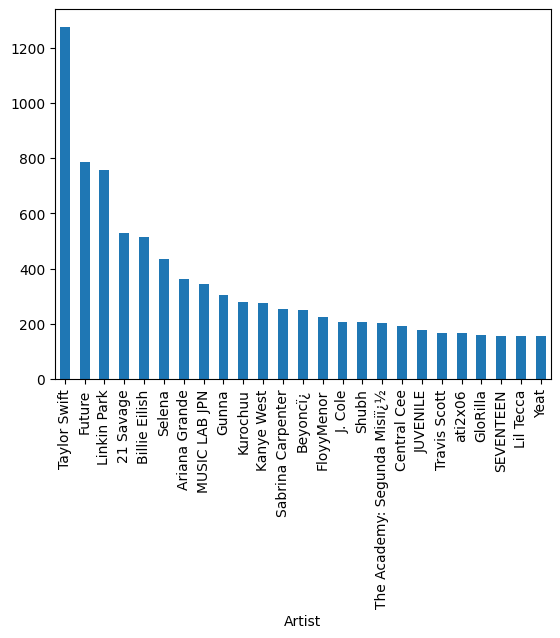

In [92]:
artist_score.plot(kind='bar')

<Axes: xlabel='Artist'>

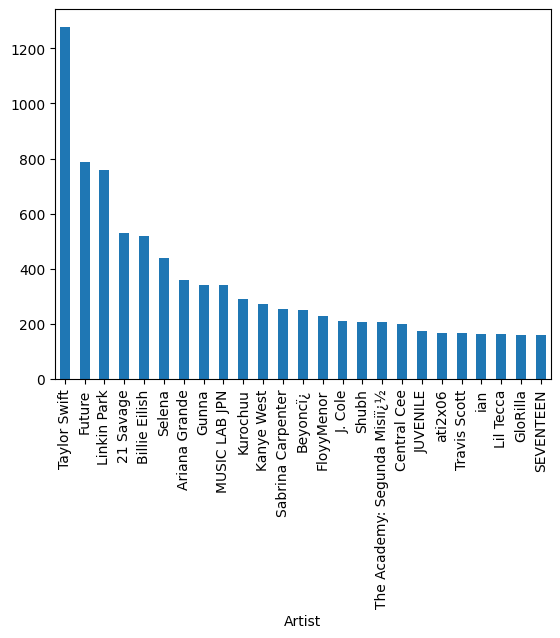

In [93]:
artist_score_preds.plot(kind='bar')
plt.title()

Text(0.5, 1.0, 'Distribution of Predicted Track Score')

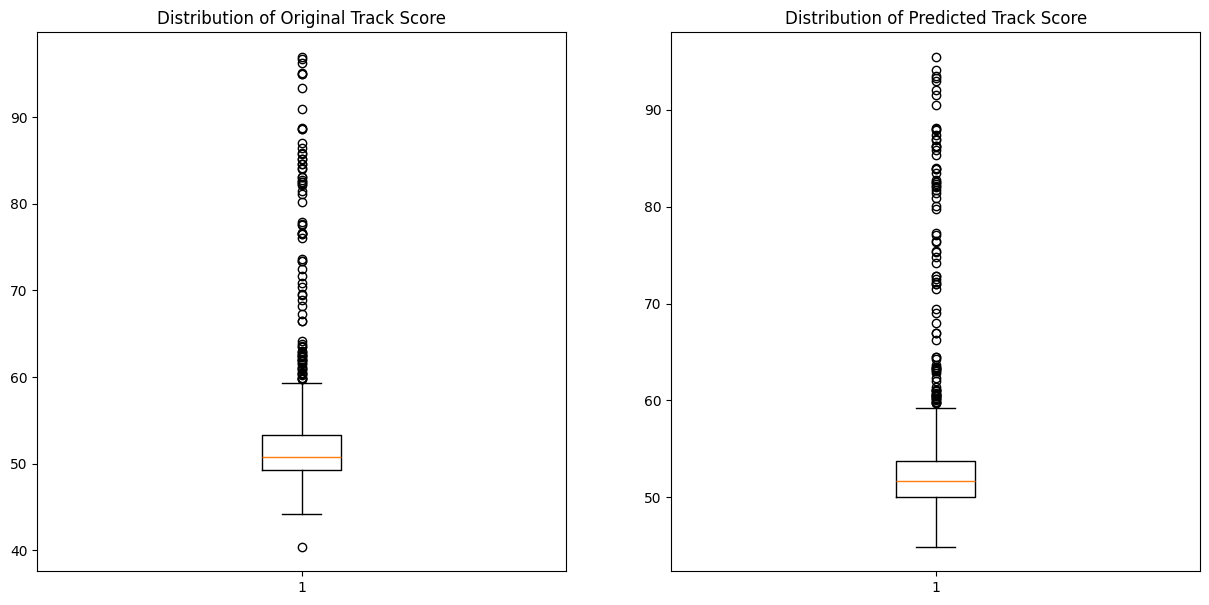

In [95]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

ax1.boxplot(finals['track_perf'])
ax1.set_title("Distribution of Original Track Score")

ax2.boxplot(finals['predicted score'])
ax2.set_title("Distribution of Predicted Track Score")

#the Custom Track Score is more tightly distributed and thus be used to make predictions